In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from csv import reader
from statistics import mode
import random

## Data Reading

In [68]:
headings = ["Price", "Maintenance Cost", "Doors", "Capacity", "Luggage Space", "Safety", "Rating"]
data =  pd.read_csv("car.data", ',', names=headings)
data[data=="5more"] = 5
data[data=="more"] = 6
data[data=="vhigh"] = 4
data[data=="high"] = 3
data[data=="med"] = 2
data[data=="low"] = 1
data[data=="small"] = 1
data[data=="big"] = 3
for i in range(7):
    data[data==str(i)] = i

data = data.sample(frac = 1)
training_data = data.iloc[:1300]
test_data = data.iloc[1300:]


## K Nearest Neighbours

In [69]:
def getEuclideanDistances(data, testPoint):
  return (np.sum((data - testPoint)**2,axis = 1))**0.5

In [70]:
def KNN(test_point, k):
    X = training_data.drop("Rating", axis=1)
    y = training_data["Rating"]
    y = y.values

    neighbours_rating = []
    distances =  getEuclideanDistances(X, test_point)
    
    neighbours = distances.argsort()[:k]
    for id in neighbours:
        neighbours_rating.append(y[id])
    
    #rating = max(neighbours_rating, key=neighbours_rating.count)
    rating  = mode(neighbours_rating)
    return rating


In [71]:
point = np.array([1,1,5,6,3,3])
rating = KNN(point, 3)
rating

'vgood'

### Evaluation

In [72]:
ratings = {"unacc": 0, "acc": 1, "good": 2, "vgood": 3}
confusion_matrix = np.zeros((4,4))

test_X = test_data.drop("Rating", axis=1)
test_y = test_data["Rating"]
for i in range(len(test_X)):
    test_rating = KNN(test_X.iloc[i], 3)
    real_rating = test_y.iloc[i]
    confusion_matrix[ ratings[test_rating] ][ ratings[real_rating] ] += 1

In [73]:
def precision(confusion_matrix):
    # Unacceptable
    unacc = confusion_matrix[0][0] / sum(confusion_matrix[0])

    # Acceptable
    acc = confusion_matrix[1][1] / sum(confusion_matrix[1])

    # Good 
    good = confusion_matrix[2][2] / sum(confusion_matrix[2])

    # Very Good
    vgood = confusion_matrix[3][3] / sum(confusion_matrix[3])

    return [unacc, acc, good, vgood]

def recall(confusion_matrix):
    u = a = g = v = 0
    for i in range(4):
        u += confusion_matrix[i][0]
        a += confusion_matrix[i][1]
        g += confusion_matrix[i][2]
        v += confusion_matrix[i][3]

    # Unacceptable
    unacc = confusion_matrix[0][0] / u

    # Acceptable
    acc = confusion_matrix[1][1] / a

    # Good 
    good = confusion_matrix[2][2] / g

    # Very Good
    vgood = confusion_matrix[3][3] / v
    
    return [unacc, acc, good, vgood]

def F1(precision, recall):
    unacc = 2 * (precision[0] * recall[0]) / (precision[0] + recall[0])

    acc = 2 * (precision[1] * recall[1]) / (precision[1] + recall[1])

    good = 2 * (precision[2] * recall[2]) / (precision[2] + recall[2])

    vgood = 2 * (precision[3] * recall[3]) / (precision[3] + recall[3])

    return [unacc, acc, good, vgood]

def macroF1(f1_scores):
    return sum(f1_scores) / 4

def macroPrecision(precision):
    return sum(precision) / 4

def macroRecall(recall):
    return sum(recall) / 4

def metrics(cofusion_matrix):
    tp = fp = fn = 0
    for i in range(4):
        for j in range(4):
            if i == j:
                tp += cofusion_matrix[i][j]
            else:
                fp += confusion_matrix[i][j]
                fn += confusion_matrix[j][i]
    return tp, fp, fn

def microPrecision(tp, fp, fn):
    return tp / (tp + fp)

def microRecall(tp, fp, fn):
    return tp / (tp + fn)

def microF1(micro_prec, micro_recall):
    return 2 * (micro_prec * micro_recall) / (micro_prec + micro_recall)


In [74]:
prec = precision(confusion_matrix)
rec = recall(confusion_matrix)
f1 = F1(prec, rec)
tp, fp, fn = metrics(confusion_matrix)
macro_f1 = macroF1(f1)
macro_prec = macroPrecision(prec)
macro_recall = macroRecall(rec)
micro_prec = microPrecision(tp, fp, fn)
micro_recall = microRecall(tp, fp, fn)
micro_f1 = microF1(micro_prec, micro_recall)

print("Class: Unacceptable")
print("Precision: ", prec[0]*100)
print("Recall: ", rec[0]*100)
print("F1: ", f1[0])
print()
print("Class: Acceptable")
print("Precision: ", prec[1]*100)
print("Recall: ", rec[1]*100)
print("F1: ", f1[1])
print()
print("Class: Good")
print("Precision: ", prec[2]*100)
print("Recall: ", rec[2]*100)
print("F1: ", f1[2])
print()
print("Class: Very Good")
print("Precision: ", prec[3]*100)
print("Recall: ", rec[3]*100)
print("F1: ", f1[3])
print()
print("Macro Precision: ", macro_prec*100)
print("Macro Recall: ", macro_recall*100)
print("Macro F1: ", macro_f1)
print()
print("Micro Precision: ", micro_prec*100)
print("Micro Recall: ", micro_recall*100)
print("Micro F1: ", micro_f1)
print("Average: ", micro_f1*100)


Class: Unacceptable
Precision:  96.33333333333334
Recall:  97.96610169491525
F1:  0.9714285714285715

Class: Acceptable
Precision:  86.73469387755102
Recall:  85.0
F1:  0.8585858585858585

Class: Good
Precision:  62.5
Recall:  52.63157894736842
F1:  0.5714285714285714

Class: Very Good
Precision:  85.71428571428571
Recall:  85.71428571428571
F1:  0.8571428571428571

Macro Precision:  82.82057823129252
Macro Recall:  80.32799158914234
Macro F1:  0.8146464646464647

Micro Precision:  92.5233644859813
Micro Recall:  92.5233644859813
Micro F1:  0.9252336448598131
Average:  92.5233644859813


In [75]:
print(confusion_matrix)

[[289.   9.   2.   0.]
 [  6.  85.   5.   2.]
 [  0.   6.  10.   0.]
 [  0.   0.   2.  12.]]


## K Means Clustering

In [76]:
new_data = pd.read_csv("hcvdat0.csv", ",", names = ["Class", "h1", "h2", "h3", "h4", "h5", "h6", "h7", "h8", "h9", "h10", "h11"])
new_data
X = new_data.drop("Class", axis=1)
y = new_data["Class"]
y = y.values
X

,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11
1,32.0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32.0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32.0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,32.0,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...
611,64.0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64.0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46.0,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,59.0,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [77]:
def expectation(k, centroids):
    points = np.zeros(X.shape[0])

    for i in range(len(points)):
        dist =  getEuclideanDistances(np.array(X.iloc[i]) , centroids)
        #print("Distance:" ,dist)
        min_dist = np.argmin(dist)
        points[i] = min_dist

    return points
    

def maximisation(k, points):
    m, n = X.shape
    centroids = np.zeros((k, n))

    for i in range(len(centroids)):
        centroids[i] = np.mean(X[points == i], axis = 0)

    return centroids


In [78]:
def KMeans(k, init_centroids):
    m, n = X.shape
    points = np.zeros(m)
    centroids = init_centroids

    for i in range(100):
        points = expectation(k, centroids)
        centroids = maximisation(k, points)

    return points, centroids

In [79]:
X = X.sample(frac = 1)
init_centroids = np.array([X.iloc[100], X.iloc[600], X.iloc[500]])
#print(X.iloc[100], X.iloc[600], X.iloc[1500])
points, centroids = KMeans(3, init_centroids) 

In [84]:
centroids

array([[ 48.7       ,  41.26565657,  67.48658537,  47.15858586,
         68.698     ,  22.17      ,   7.8573    ,   5.18466667,
         78.184     ,  84.876     ,  73.01515152],
       [ 47.04780876,  41.88047809,  66.37868526,  24.38645418,
         26.23884462,   9.00756972,   8.3202988 ,   5.41703187,
         78.04960159,  23.85338645,  71.96294821],
       [ 53.        ,  33.91666667, 154.75      ,  45.86666667,
        110.81666667,  21.89166667,   5.95666667,   4.875     ,
        240.55833333, 319.9       ,  67.68333333]])

In [80]:
k_Meancluster1 = X.iloc[np.where(points == 0)[0],:]
k_Meancluster2 = X.iloc[np.where(points == 1)[0],:]
k_Meancluster3 = X.iloc[np.where(points == 2)[0],:]
clusters = [k_Meancluster1, k_Meancluster2, k_Meancluster3]

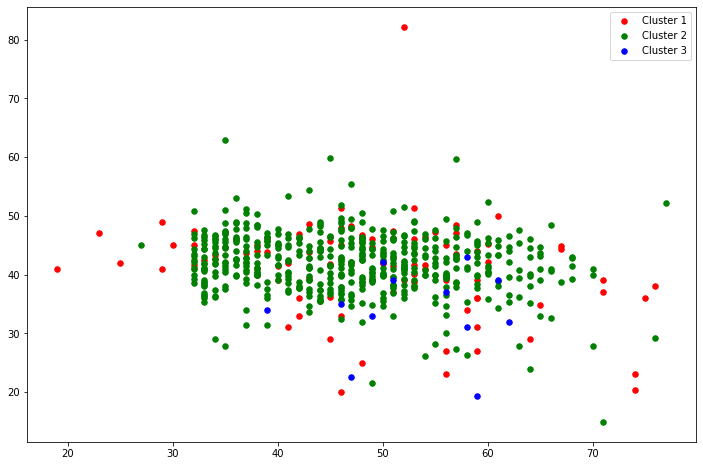

In [81]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(k_Meancluster1.iloc[:,0], k_Meancluster1.iloc[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(k_Meancluster2.iloc[:,0], k_Meancluster2.iloc[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(k_Meancluster3.iloc[:,0], k_Meancluster3.iloc[:,1], s=30, color='b', label='Cluster 3')
#ax.scatter(k_Meancluster4.iloc[:,0], k_Meancluster4.iloc[:,1], s=30, color='black', label='Cluster 4')
#ax.scatter(k_Meancluster5.iloc[:,0], k_Meancluster5.iloc[:,1], s=30, color='yellow', label='Cluster 5')
ax.legend()

In [86]:
def DBIndex(clusters, centroids, k):
    cluster_scatter = []
    dbi = []

    for i in range(k):
        e_dist = pow(abs(clusters[i] - centroids[i]), 2)
        e_distances  =  np.sum((np.sum(e_dist, axis = 1)) ** 0.5)  
        scatter = (1 / len(clusters[i])) * e_distances
        cluster_scatter.append(scatter)
    
    for i in range(k):
        cluster_measure = []
        for j in range(k):
            if i != j:
                cluster_measure.append((cluster_scatter[i] + cluster_scatter[j]) / ((np.sum( (centroids[i] - centroids[j]) **2) ) **0.5))
        dbi.append(max(cluster_measure))

    return np.sum(dbi) / k

In [88]:
print("DBIndex for k = 3: ", DBIndex(clusters, centroids, 3))

DBIndex for k = 3:  1.4349972196697054
